In [265]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.mixture import GaussianMixture as GMM
from numpy import array
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve

In [40]:
bc = datasets.load_breast_cancer()
X_bc, y_bc, df_bc = bc.data, bc.target, pd.DataFrame(bc['data'],columns=bc['feature_names'])
df_oc = pd.read_csv("occupancy_data.csv")
X_occ,y_occ = df_oc.iloc[:,:5],df_oc.iloc[:,5]


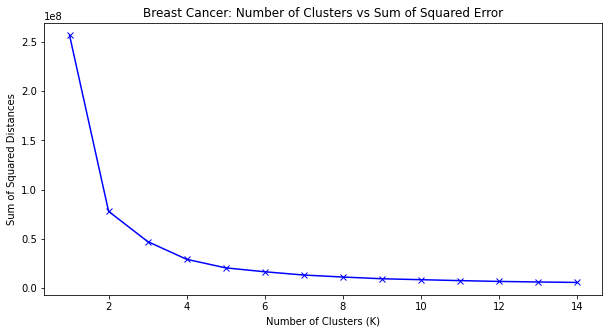

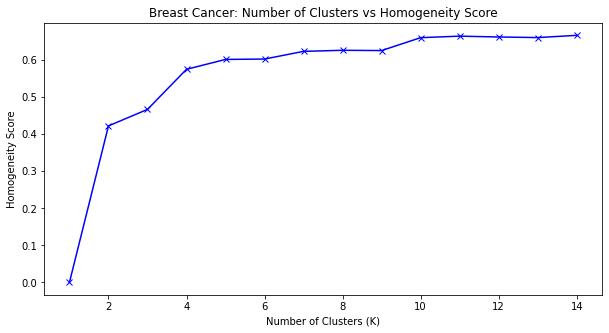

{1: 256677243.9542025, 2: 77943099.87829883, 3: 47264841.91676834, 4: 29226541.651979793, 5: 20535235.908362117, 6: 16558716.70201728, 7: 13249736.06832689, 8: 11209948.621980883, 9: 9473663.100148344, 10: 8504745.060346993, 11: 7580807.641350361, 12: 6739918.067987348, 13: 6197573.275251872, 14: 5711411.823917157}


In [47]:
sse = []
hom = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_bc)
    sse.append(km.inertia_)
    lab = km.fit_predict(X_bc)
    hom.append(metrics.homogeneity_score(y_bc, lab))
    
plt.figure(figsize=(10,5))
plt.plot(K, sse, 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances')
plt.title('Breast Cancer: Number of Clusters vs Sum of Squared Error')
plt.show()
plt.figure(figsize=(10,5))
plt.plot(K, hom, 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Homogeneity Score')
plt.title('Breast Cancer: Number of Clusters vs Homogeneity Score')
plt.show()
print(dict(zip(K, sse)))

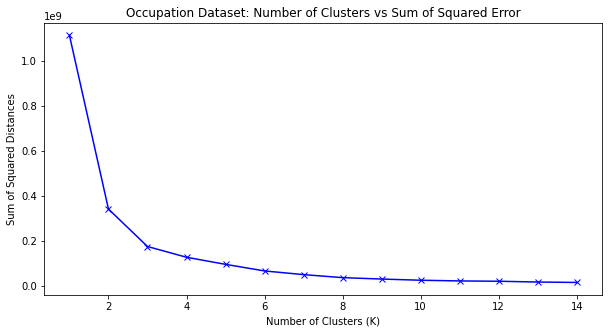

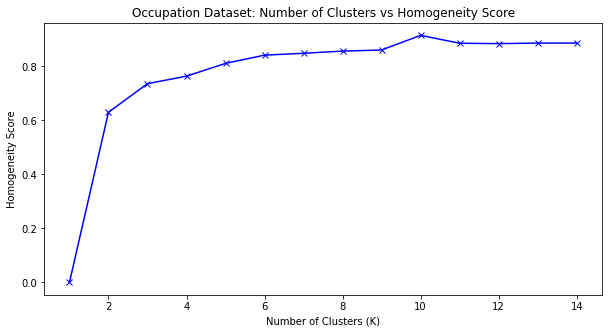

{1: 1113493673.6792684, 2: 342387267.9369814, 3: 176233631.2213728, 4: 128476915.90941623, 5: 96994155.22639269, 6: 67740939.88210951, 7: 51430751.86156601, 8: 38012283.48162812, 9: 31754172.64595978, 10: 26460874.732970532, 11: 23419397.688054442, 12: 22012553.195381977, 13: 18522317.861050684, 14: 16680284.433933867}


In [57]:
sse = []
hom = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_oc)
    sse.append(km.inertia_)
    lab = km.fit_predict(X_occ)
    hom.append(metrics.homogeneity_score(y_occ, lab))
    
plt.figure(figsize=(10,5))
plt.plot(K, sse, 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances')
plt.title('Occupation Dataset: Number of Clusters vs Sum of Squared Error')
plt.show()
plt.figure(figsize=(10,5))
plt.plot(K, hom, 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Homogeneity Score')
plt.title('Occupation Dataset: Number of Clusters vs Homogeneity Score')
plt.show()
print(dict(zip(K, sse)))

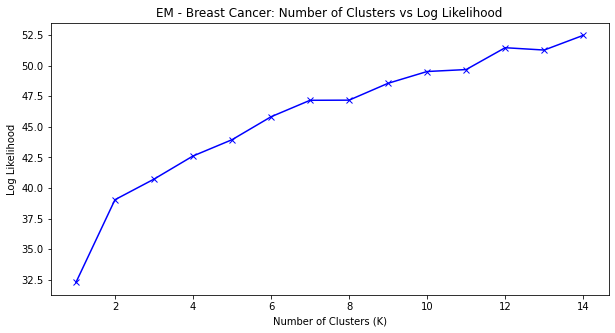

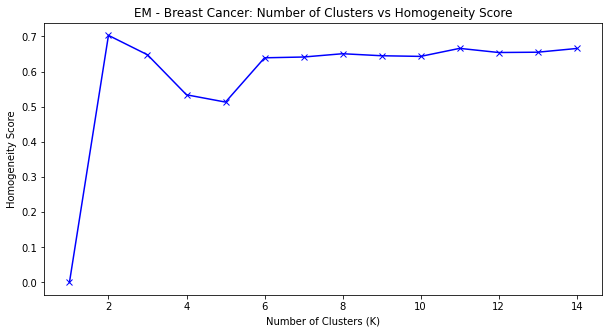

{1: 32.290616089883784, 2: 39.04680426491356, 3: 40.727415544904254, 4: 42.61798818846205, 5: 43.94755786345066, 6: 45.822252209351184, 7: 47.16705216897217, 8: 47.1783607968043, 9: 48.55653376226199, 10: 49.51739389356926, 11: 49.67689842022891, 12: 51.46130265132316, 13: 51.27025755997758, 14: 52.470336765022324}


In [56]:
sse = []
hom = []
K = range(1,15)
for k in K:
    km = GMM(n_components=k)
    km.fit(X_bc)
    sse.append(km.score(X_bc))
    lab = km.predict(X_bc)
    hom.append(metrics.homogeneity_score(y_bc, lab))
    
plt.figure(figsize=(10,5))
plt.plot(K, sse, 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Log Likelihood')
plt.title('EM - Breast Cancer: Number of Clusters vs Log Likelihood')
plt.show()
plt.figure(figsize=(10,5))
plt.plot(K, hom, 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Homogeneity Score')
plt.title('EM - Breast Cancer: Number of Clusters vs Homogeneity Score')
plt.show()
print(dict(zip(K, sse)))

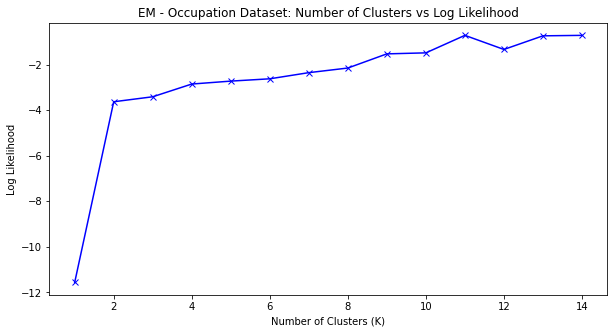

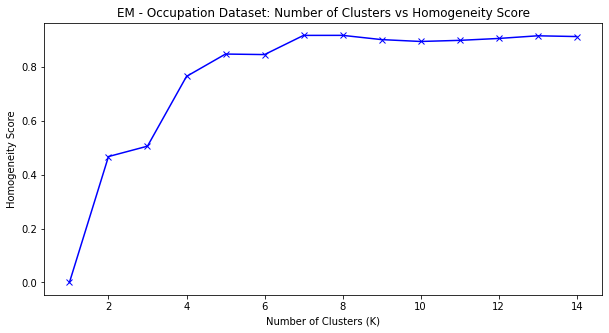

{1: -11.562617034619132, 2: -3.6299028342648203, 3: -3.410727458930668, 4: -2.85207718292623, 5: -2.723531086677294, 6: -2.621818138481924, 7: -2.351701579745899, 8: -2.1492386824301684, 9: -1.52748408519287, 10: -1.4828036052483666, 11: -0.7144843029448195, 12: -1.3334445234277448, 13: -0.7352550248271109, 14: -0.7148148634964668}


In [60]:
sse = []
hom = []
K = range(1,15)
for k in K:
    km = GMM(n_components=k)
    km.fit(X_occ)
    sse.append(km.score(X_occ))
    lab = km.predict(X_occ)
    hom.append(metrics.homogeneity_score(y_occ, lab))
    
plt.figure(figsize=(10,5))
plt.plot(K, sse, 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Log Likelihood')
plt.title('EM - Occupation Dataset: Number of Clusters vs Log Likelihood')
plt.show()
plt.figure(figsize=(10,5))
plt.plot(K, hom, 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Homogeneity Score')
plt.title('EM - Occupation Dataset: Number of Clusters vs Homogeneity Score')
plt.show()
print(dict(zip(K, sse)))

Text(0.5, 1.0, 'Occupation Dataset: Variance Explained vs Principal Component')

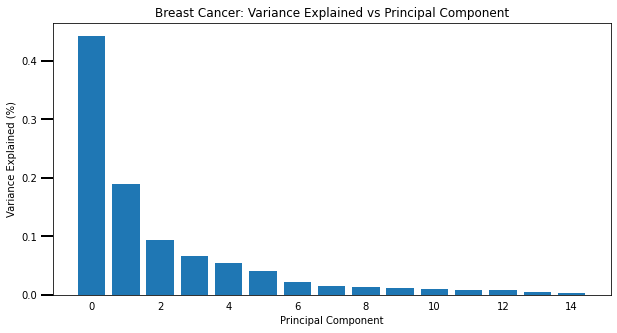

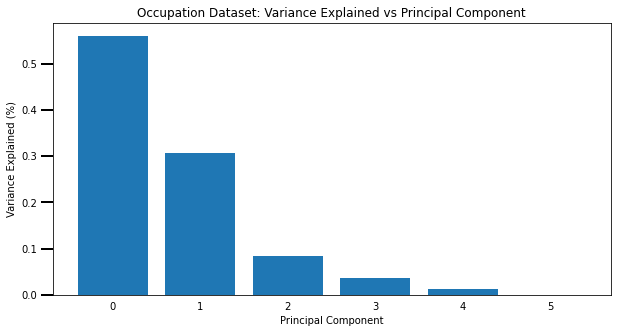

In [74]:
pca = PCA(15)
np_data = array(df_bc)
scaler = StandardScaler()
norm_data = scaler.fit_transform(np_data)
pca.fit(norm_data)
vals = pca.explained_variance_ratio_
agg = np.cumsum(vals)
eigenvecs= pca.components_
eigenvals = pca.explained_variance_
num_components=len(pca.explained_variance_ratio_)
ind = np.arange(num_components)
vals = pca.explained_variance_ratio_

plt.figure(figsize=(10, 5))
ax = plt.subplot(111)
ax.bar(ind, vals)    

#ax.plot(ind, cumvals)

ax.xaxis.set_tick_params(width=0)
ax.yaxis.set_tick_params(width=2, length=12)

ax.set_xlabel("Principal Component")
ax.set_ylabel("Variance Explained (%)")
plt.title('Breast Cancer: Variance Explained vs Principal Component')

pca = PCA(6)
np_data = array(df_oc)
scaler = StandardScaler()
norm_data = scaler.fit_transform(np_data)
pca.fit(norm_data)
vals = pca.explained_variance_ratio_
agg = np.cumsum(vals)
eigenvecs= pca.components_
eigenvals = pca.explained_variance_
num_components=len(pca.explained_variance_ratio_)
ind = np.arange(num_components)
vals = pca.explained_variance_ratio_

plt.figure(figsize=(10, 5))
ax = plt.subplot(111)
ax.bar(ind, vals)    

#ax.plot(ind, cumvals)

ax.xaxis.set_tick_params(width=0)
ax.yaxis.set_tick_params(width=2, length=12)

ax.set_xlabel("Principal Component")
ax.set_ylabel("Variance Explained (%)")
plt.title('Occupation Dataset: Variance Explained vs Principal Component')

Text(0.5, 1.0, 'Occupation Dataset: Kurtosis vs Independant Component')

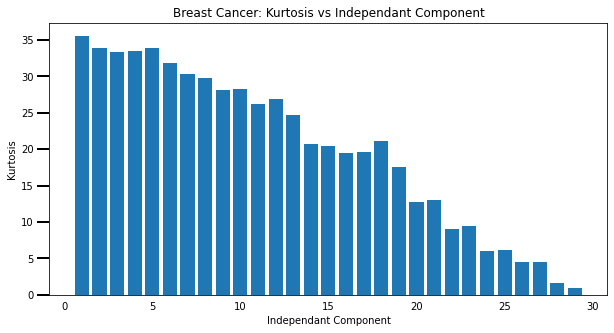

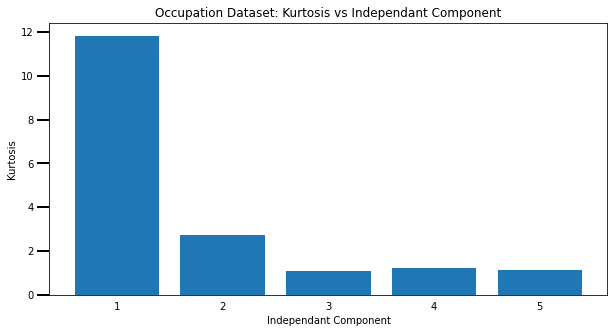

In [157]:
from sklearn.decomposition import PCA, FastICA
from sklearn.random_projection import GaussianRandomProjection 
from sklearn.cluster import FeatureAgglomeration
np_data = array(df_bc)
scaler = StandardScaler()
norm_data = scaler.fit_transform(np_data)

ica = FastICA()
kurt = {}
a = [0]
for i in range(1, 30):
    ica.set_params(n_components=i)
    tmp = ica.fit_transform(norm_data)
    tmp = pd.DataFrame(tmp)
    tmp = tmp.kurt(axis=0)
    kurt[i] = tmp.abs().mean()
    
plt.figure(figsize=(10, 5))
ax = plt.subplot(111)
ax.bar(sorted(kurt.keys(), reverse=True), kurt.values())

#ax.plot(ind, cumvals)

ax.xaxis.set_tick_params(width=0)
ax.yaxis.set_tick_params(width=2, length=12)

ax.set_xlabel("Independant Component")
ax.set_ylabel("Kurtosis")
plt.title('Breast Cancer: Kurtosis vs Independant Component')

np_data = array(df_oc)
scaler = StandardScaler()
norm_data = scaler.fit_transform(np_data)

ica = FastICA()
kurt = {}
a = [0]
for i in range(1, 6):
    ica.set_params(n_components=i)
    tmp = ica.fit_transform(norm_data)
    tmp = pd.DataFrame(tmp)
    tmp = tmp.kurt(axis=0)
    kurt[i] = tmp.abs().mean()
    
plt.figure(figsize=(10, 5))
ax = plt.subplot(111)
ax.bar(sorted(kurt.keys(), reverse=True), kurt.values())

#ax.plot(ind, cumvals)

ax.xaxis.set_tick_params(width=0)
ax.yaxis.set_tick_params(width=2, length=12)

ax.set_xlabel("Independant Component")
ax.set_ylabel("Kurtosis")
plt.title('Occupation Dataset: Kurtosis vs Independant Component')

In [168]:
def pwd(X1,X2):
    d1,d2 = pairwise_distances(X1),pairwise_distances(X2)
    return np.corrcoef(d1.ravel(),d2.ravel())[0,1]
from sklearn.metrics.pairwise import pairwise_distances

Text(0.5, 1.0, 'Occupation Dataset: Accuracy vs Number of Components')

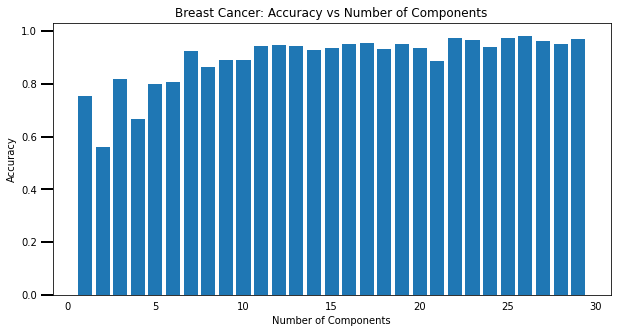

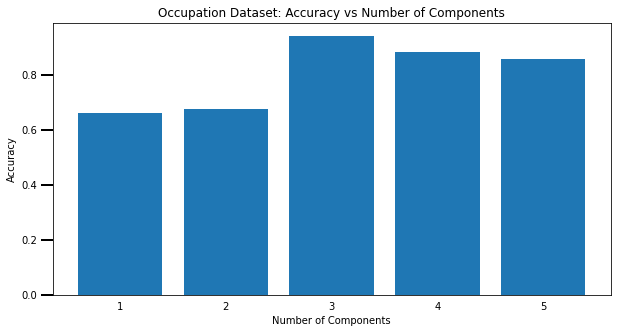

In [183]:
from collections import defaultdict
from sklearn.random_projection import SparseRandomProjection, GaussianRandomProjection
np_data = array(df_bc)
scaler = StandardScaler()
norm_data = scaler.fit_transform(np_data)

tmp={}
tmp = defaultdict(dict)
for i in range(1, 30):
    rp = SparseRandomProjection(n_components=i)
    tmp[i] = pwd(rp.fit_transform(norm_data), norm_data)
plt.figure(figsize=(10, 5))
ax = plt.subplot(111)
ax.bar(tmp.keys(), tmp.values())

#ax.plot(ind, cumvals)

ax.xaxis.set_tick_params(width=0)
ax.yaxis.set_tick_params(width=2, length=12)

ax.set_xlabel("Number of Components")
ax.set_ylabel("Accuracy")
plt.title('Breast Cancer: Accuracy vs Number of Components')

np_data = array(df_oc)
scaler = StandardScaler()
norm_data = scaler.fit_transform(np_data)

tmp={}
tmp = defaultdict(dict)
for i in range(1, 6):
    rp = SparseRandomProjection(n_components=i)
    tmp[i] = pwd(rp.fit_transform(norm_data), norm_data)
plt.figure(figsize=(10, 5))
ax = plt.subplot(111)
ax.bar(tmp.keys(), tmp.values())

#ax.plot(ind, cumvals)

ax.xaxis.set_tick_params(width=0)
ax.yaxis.set_tick_params(width=2, length=12)

ax.set_xlabel("Number of Components")
ax.set_ylabel("Accuracy")
plt.title('Occupation Dataset: Accuracy vs Number of Components')

Text(0.5, 1.0, 'Occupation Dataset: Chi Squared Value vs Components')

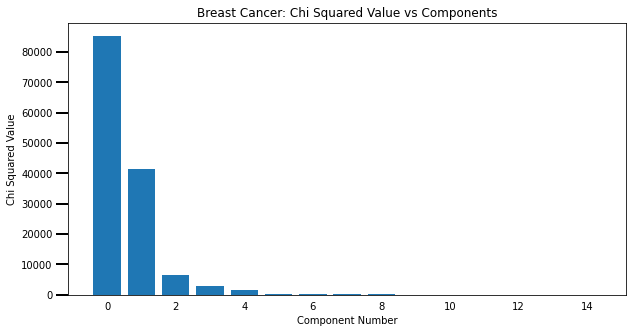

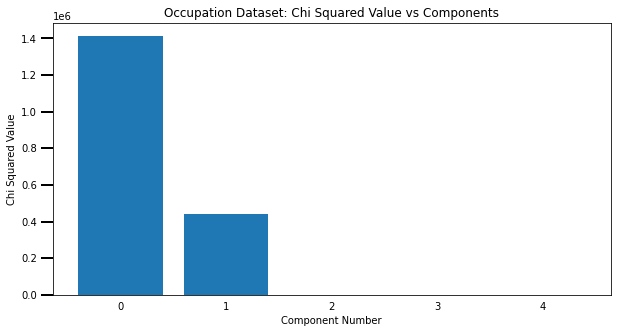

In [214]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs


X_train, X_test, y_train, y_test = train_test_split(X_bc, y_bc, test_size=0.33, random_state=1)
X_train_enc, X_test_enc = X_train, X_test
y_train_enc, y_test_enc = y_train, y_test
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)
a = {}
for i in range(len(fs.scores_)):
    a[i] = fs.scores_[i]
plt.figure(figsize=(10, 5))
ax = plt.subplot(111)
a2 = sorted(a.items(), key=lambda x: -x[1])
ax.bar(list(a.keys())[:15], [i[1] for i in a2][:15])

#ax.plot(ind, cumvals)

ax.xaxis.set_tick_params(width=0)
ax.yaxis.set_tick_params(width=2, length=12)

ax.set_xlabel("Component Number")
ax.set_ylabel("Chi Squared Value")
plt.title('Breast Cancer: Chi Squared Value vs Components')


X_train, X_test, y_train, y_test = train_test_split(X_occ, y_occ, test_size=0.33, random_state=1)
X_train_enc, X_test_enc = X_train, X_test
y_train_enc, y_test_enc = y_train, y_test
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)
a = {}
for i in range(len(fs.scores_)):
    a[i] = fs.scores_[i]
plt.figure(figsize=(10, 5))
ax = plt.subplot(111)
a2 = sorted(a.items(), key=lambda x: -x[1])
ax.bar(list(a.keys())[:15], [i[1] for i in a2][:15])

#ax.plot(ind, cumvals)

ax.xaxis.set_tick_params(width=0)
ax.yaxis.set_tick_params(width=2, length=12)

ax.set_xlabel("Component Number")
ax.set_ylabel("Chi Squared Value")
plt.title('Occupation Dataset: Chi Squared Value vs Components')

In [241]:
breast_cancer_sse = {"pca":[], "ica":[], "rp":[], "chi":[]}
np_data = array(df_bc)
scaler = StandardScaler()
norm_data = scaler.fit_transform(np_data)
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    pca_vals = PCA(2).fit(norm_data).transform(norm_data)
    ica_vals = FastICA(13).fit_transform(norm_data)
    rp_vals = SparseRandomProjection(200).fit_transform(norm_data)
    chi_vals = PCA(1).fit(norm_data).transform(norm_data)
    breast_cancer_sse["pca"].append(km.fit(pca_vals).inertia_)
    breast_cancer_sse["ica"].append(km.fit(ica_vals).inertia_)
    breast_cancer_sse["rp"].append(km.fit(rp_vals).inertia_)
    breast_cancer_sse["chi"].append(km.fit(chi_vals).inertia_)


/usr/local/Cellar/jupyterlab/2.1.1/libexec/lib/python3.8/site-packages/sklearn/random_projection.py:385: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (30 < 200).The dimensionality of the problem will not be reduced.
  warnings.warn(
/usr/local/Cellar/jupyterlab/2.1.1/libexec/lib/python3.8/site-packages/sklearn/random_projection.py:385: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (30 < 200).The dimensionality of the problem will not be reduced.
  warnings.warn(
/usr/local/Cellar/jupyterlab/2.1.1/libexec/lib/python3.8/site-packages/sklearn/random_projection.py:385: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (30 < 200).The dimensionality of the problem will not be reduced.
  warnings.warn(
/usr/local/Cellar/jupyterlab/2.1.1/libexec/lib/python3.8/site-packages/sklearn/random

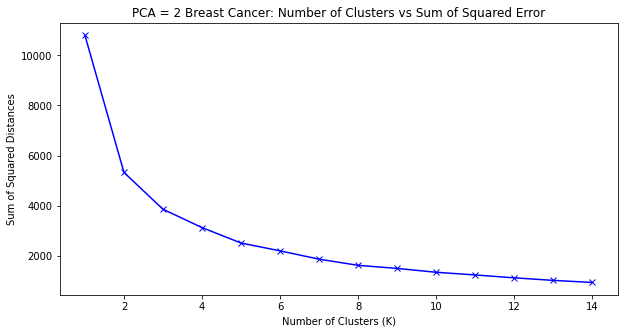

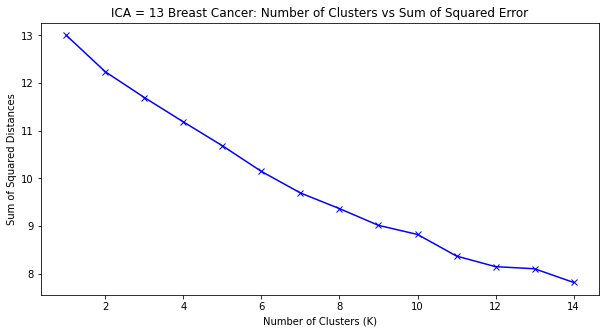

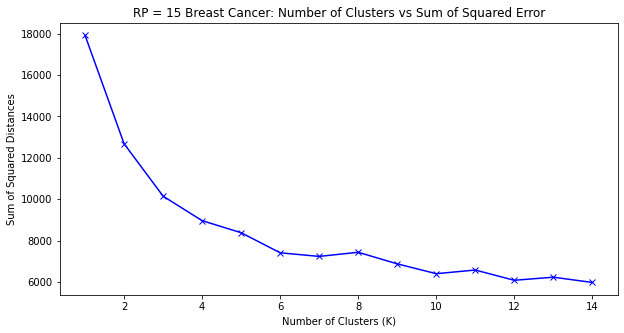

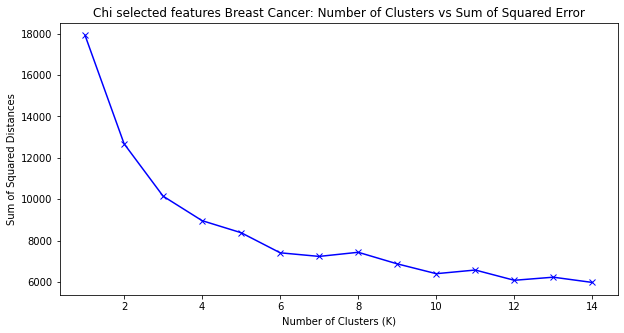

In [244]:
plt.figure(figsize=(10,5))
plt.plot(K, breast_cancer_sse["pca"], 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances')
plt.title('PCA = 2 Breast Cancer: Number of Clusters vs Sum of Squared Error')
plt.show()
plt.figure(figsize=(10,5))
plt.plot(K, breast_cancer_sse["ica"], 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances')
plt.title('ICA = 13 Breast Cancer: Number of Clusters vs Sum of Squared Error')
plt.show()
plt.figure(figsize=(10,5))
plt.plot(K, breast_cancer_sse["rp"], 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances')
plt.title('RP = 15 Breast Cancer: Number of Clusters vs Sum of Squared Error')
plt.show()
plt.figure(figsize=(10,5))
plt.plot(K, breast_cancer_sse["rp"], 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances')
plt.title('Chi selected features Breast Cancer: Number of Clusters vs Sum of Squared Error')
plt.show()

In [247]:
breast_cancer_sse = {"pca":[], "ica":[], "rp":[], "chi":[]}
np_data = array(df_oc)
scaler = StandardScaler()
norm_data = scaler.fit_transform(np_data)
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    pca_vals = PCA(2).fit(norm_data).transform(norm_data)
    ica_vals = FastICA(2).fit_transform(norm_data)
    rp_vals = SparseRandomProjection(3).fit_transform(norm_data)
    chi_vals = PCA(1).fit(norm_data).transform(norm_data)
    breast_cancer_sse["pca"].append(km.fit(pca_vals).inertia_)
    breast_cancer_sse["ica"].append(km.fit(ica_vals).inertia_)
    breast_cancer_sse["rp"].append(km.fit(rp_vals).inertia_)
    breast_cancer_sse["chi"].append(km.fit(chi_vals).inertia_)


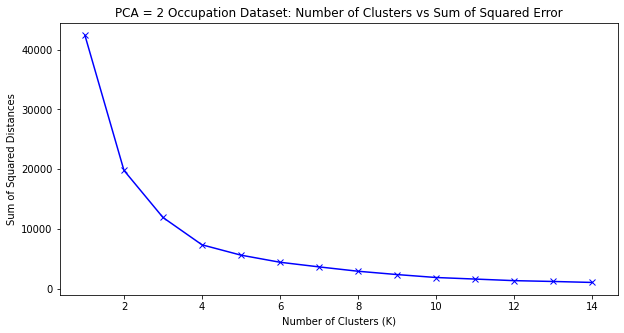

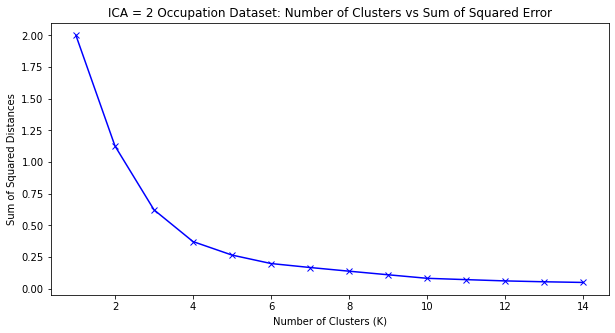

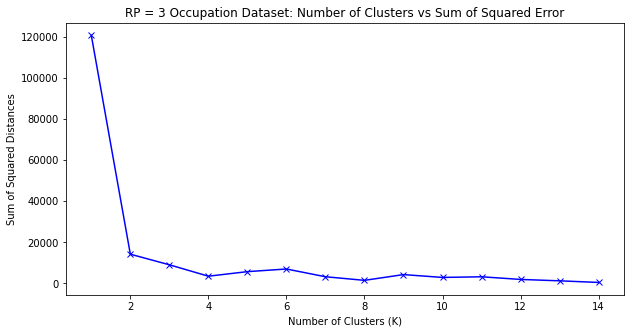

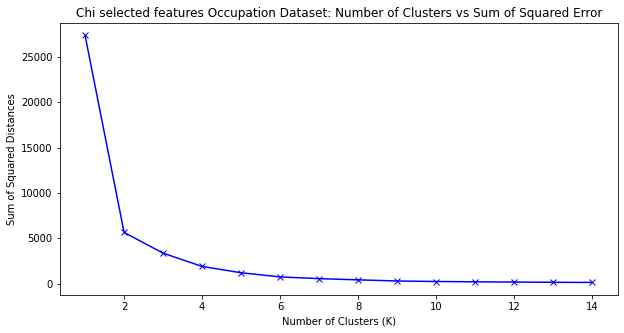

In [249]:
plt.figure(figsize=(10,5))
plt.plot(K, breast_cancer_sse["pca"], 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances')
plt.title('PCA = 2 Occupation Dataset: Number of Clusters vs Sum of Squared Error')
plt.show()
plt.figure(figsize=(10,5))
plt.plot(K, breast_cancer_sse["ica"], 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances')
plt.title('ICA = 2 Occupation Dataset: Number of Clusters vs Sum of Squared Error')
plt.show()
plt.figure(figsize=(10,5))
plt.plot(K, breast_cancer_sse["rp"], 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances')
plt.title('RP = 3 Occupation Dataset: Number of Clusters vs Sum of Squared Error')
plt.show()
plt.figure(figsize=(10,5))
plt.plot(K, breast_cancer_sse["chi"], 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances')
plt.title('Chi selected features Occupation Dataset: Number of Clusters vs Sum of Squared Error')
plt.show()

In [256]:
X_bc, y_bc = datasets.load_breast_cancer(return_X_y=True)
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, random_state=0, test_size=0.4)

df = pd.read_csv("occupancy_data.csv")
X_occ = df.iloc[:,:5]
y_occ = df.iloc[:,5]
X_train_occ, X_test_occ, y_train_occ, y_test_occ = train_test_split(X_occ, y_occ, random_state=0, test_size=0.4)


In [307]:
all_dr = []
for i in ["pca", "ica", "rp", "chi"]:
    if(i == "pca"):
        model = PCA(2)
    if(i == "ica"):
        model = FastICA(13)
    if(i == "rp"):
        model = SparseRandomProjection(15)
    if(i == "chi"):
        model = PCA(1)
    X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(model.fit(X_bc).transform(X_bc), y_bc, random_state=0, test_size=0.4)
    X_train_occ, X_test_occ, y_train_occ, y_test_occ = train_test_split(model.fit(X_occ).transform(X_occ), y_occ, random_state=0, test_size=0.4)

    clf_bc = MLPClassifier(hidden_layer_sizes=10)
    clf_occ = MLPClassifier(hidden_layer_sizes=5)

    train_sizes_bc, train_scores, test_scores = learning_curve(clf_bc, X_train_bc, y_train_bc.ravel(), cv=5,n_jobs=4, train_sizes=np.linspace(.1, 1.0, 10))
    train_scores_mean_bc,test_scores_mean_bc = np.mean(train_scores, axis=1),np.mean(test_scores, axis=1)

    train_sizes_occ, train_scores, test_scores = learning_curve(clf_occ, X_train_occ, y_train_occ.ravel(), cv=5,n_jobs=4, train_sizes=np.linspace(.1, 1.0, 10))
    train_scores_mean_occ,test_scores_mean_occ = np.mean(train_scores, axis=1),np.mean(test_scores, axis=1)

    final_df = pd.DataFrame({"percentage":np.linspace(.1, 1.0, 10), "bc_training":train_scores_mean_bc, "bc_test":test_scores_mean_bc, "occ_train":train_scores_mean_occ, "occ_test":test_scores_mean_occ})
    all_dr.append(final_df)
    print(final_df)
    all_dr2.append(i)

   percentage  bc_training   bc_test  occ_train  occ_test
0         0.1     0.874074  0.897485   0.963077  0.952917
1         0.2     0.925926  0.900426   0.978745  0.965404
2         0.3     0.822222  0.818244   0.795051  0.777073
3         0.4     0.859259  0.853410   0.984773  0.977892
4         0.5     0.860294  0.876897   0.982907  0.980348
5         0.6     0.869939  0.874169   0.945990  0.947390
6         0.7     0.886316  0.894587   0.971554  0.969294
7         0.8     0.902304  0.876982   0.984133  0.981781
8         0.9     0.898361  0.891603   0.989991  0.990379
9         1.0     0.860294  0.842327   0.989458  0.989765


/usr/local/Cellar/jupyterlab/2.1.1/libexec/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:467: UserWarning: n_components is too large: it will be set to 5
  warnings.warn(


   percentage  bc_training   bc_test  occ_train  occ_test
0         0.1     0.674074  0.624638   0.748205  0.792631
1         0.2     0.681481  0.636402   0.767222  0.792631
2         0.3     0.656790  0.621697   0.774573  0.792631
3         0.4     0.587037  0.577536   0.782470  0.792631
4         0.5     0.588235  0.572421   0.797544  0.805118
5         0.6     0.699387  0.697357   0.787372  0.793245
6         0.7     0.632632  0.621697   0.813163  0.819243
7         0.8     0.641475  0.630520   0.848688  0.845855
8         0.9     0.650820  0.659847   0.898607  0.898260
9         1.0     0.696324  0.697954   0.892631  0.895394


/usr/local/Cellar/jupyterlab/2.1.1/libexec/lib/python3.8/site-packages/sklearn/random_projection.py:385: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (5 < 15).The dimensionality of the problem will not be reduced.
  warnings.warn(


   percentage  bc_training   bc_test  occ_train  occ_test
0         0.1     0.629630  0.588789   0.946667  0.935517
1         0.2     0.685185  0.699147   0.903201  0.905220
2         0.3     0.730864  0.778176   0.973891  0.966428
3         0.4     0.737037  0.715644   0.866795  0.881679
4         0.5     0.686765  0.680520   0.945548  0.944319
5         0.6     0.716564  0.686616   0.990956  0.987922
6         0.7     0.703158  0.697656   0.973821  0.970522
7         0.8     0.705991  0.690580   0.984645  0.983623
8         0.9     0.759016  0.744587   0.986693  0.985875
9         1.0     0.738235  0.738704   0.979939  0.978710
   percentage  bc_training   bc_test  occ_train  occ_test
0         0.1     0.696296  0.787127   0.816923  0.802456
1         0.2     0.881481  0.888619   0.921127  0.913613
2         0.3     0.888889  0.894501   0.951195  0.946162
3         0.4     0.825926  0.830520   0.949968  0.946571
4         0.5     0.660294  0.700384   0.951279  0.945548
5         0.6 

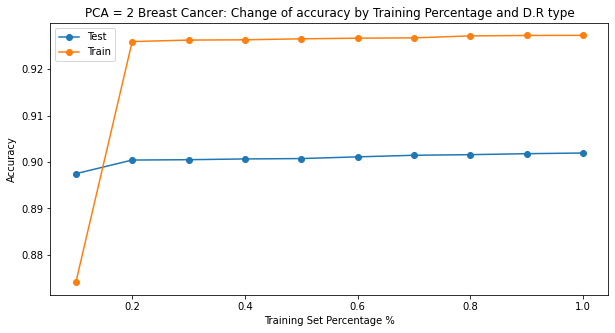

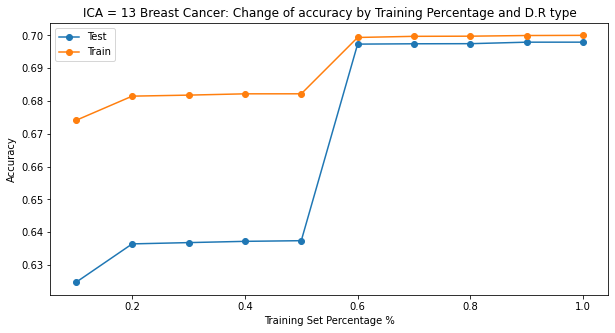

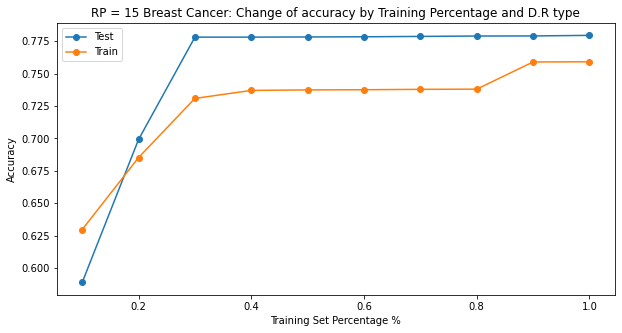

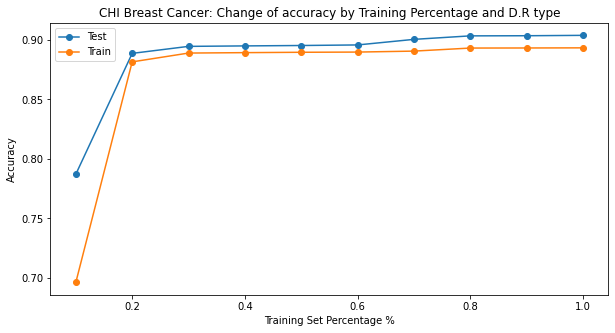

In [349]:
k = -1
for i in ["PCA = 2", "ICA = 13", "RP = 15", "CHI"]:
    k+=1
    plt.figure(figsize=(10,5))
    #plt.grid()
    plt.title(i + " Breast Cancer: Change of accuracy by Training Percentage and D.R type")
    plt.xlabel("Training Set Percentage %")
    plt.ylabel("Accuracy")
    plt.plot(all_dr2[0]["percentage"], all_dr2[k]["bc_test"], marker='o', label="Test")
    plt.plot(all_dr2[0]["percentage"], all_dr2[k]["bc_training"], marker='o', label="Train")
    plt.legend()
    plt.show()


In [318]:
km = KMeans(n_clusters=2)
km2 = GMM(n_components=k)
km = km.fit(df_bc)
km2.fit(X_bc)
df_bc["kmeans_lab"] = km.fit_predict(X_bc)
df_bc["EM_lab"] = km2.predict(X_bc)


In [494]:
bc = datasets.load_breast_cancer()
X_bc, y_bc, df_bc = bc.data, bc.target, pd.DataFrame(bc['data'],columns=bc['feature_names'])

km = KMeans(n_clusters=2)
km = km.fit(df_bc)
df_bc["kmeans_lab"] = km.fit_predict(X_bc)
X_bc = df_bc.iloc[:,:31]
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, random_state=0, test_size=0.4)

# X_bc, y_bc = datasets.load_breast_cancer(return_X_y=True)
# X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, random_state=0, test_size=0.4)

clf_bc = MLPClassifier(hidden_layer_sizes=100)

train_sizes_bc, train_scores, test_scores = learning_curve(clf_bc, X_train_bc, y_train_bc.ravel(), cv=5,n_jobs=4, train_sizes=np.linspace(.1, 1.0, 10))
train_scores_mean_bc,test_scores_mean_bc = np.mean(train_scores, axis=1),np.mean(test_scores, axis=1)

final_df = pd.DataFrame({"percentage":np.linspace(.1, 1.0, 10), "bc_training":train_scores_mean_bc, "bc_test":test_scores_mean_bc})
print(final_df)


   percentage  bc_training   bc_test
0         0.1     0.814815  0.800426
1         0.2     0.751852  0.732907
2         0.3     0.869136  0.853325
3         0.4     0.887037  0.879881
4         0.5     0.911765  0.897528
5         0.6     0.853988  0.854007
6         0.7     0.813684  0.812191
7         0.8     0.900461  0.876897
8         0.9     0.913115  0.903367
9         1.0     0.913235  0.903367


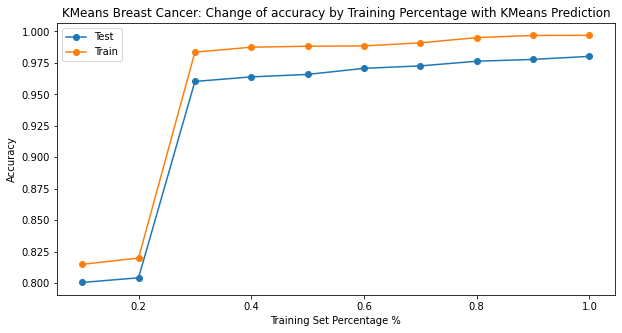

In [525]:
plt.figure(figsize=(10,5))
#plt.grid()
plt.title("KMeans Breast Cancer: Change of accuracy by Training Percentage with KMeans Prediction")
plt.xlabel("Training Set Percentage %")
plt.ylabel("Accuracy")
plt.plot(final_df2["percentage"], final_df2["bc_test"], marker='o', label="Test")
plt.plot(final_df2["percentage"], final_df2["bc_training"], marker='o', label="Train")
plt.legend()
plt.show()


In [536]:
breast_cancer_sse = {"pca":[], "ica":[], "rp":[], "chi":[]}
np_data = array(X_bc)
scaler = StandardScaler()
norm_data = scaler.fit_transform(np_data)
K = range(1,15)
for k in K:
    km = GMM(n_components=k)
    pca_vals = PCA(2).fit(norm_data).transform(norm_data)
    ica_vals = FastICA(13).fit_transform(norm_data)
    rp_vals = SparseRandomProjection(15).fit_transform(norm_data)
    chi_vals = PCA(1).fit(norm_data).transform(norm_data)
    breast_cancer_sse["pca"].append(km.fit(pca_vals).score(pca_vals))
    breast_cancer_sse["ica"].append(km.fit(ica_vals).score(ica_vals))
    breast_cancer_sse["rp"].append(km.fit(rp_vals).score(rp_vals))
    breast_cancer_sse["chi"].append(km.fit(chi_vals).score(chi_vals))


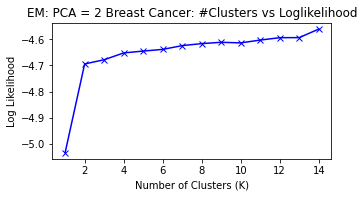

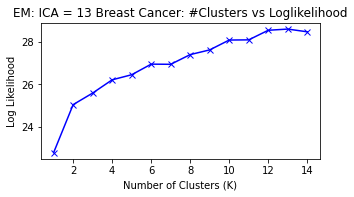

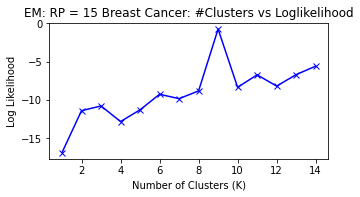

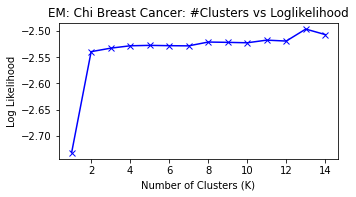

In [537]:
plt.figure(figsize=(5,2.5))
plt.plot(K, breast_cancer_sse["pca"], 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Log Likelihood')
plt.title('EM: PCA = 2 Breast Cancer: #Clusters vs Loglikelihood')
plt.show()
plt.figure(figsize=(5,2.5))
plt.plot(K, breast_cancer_sse["ica"], 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Log Likelihood')
plt.title('EM: ICA = 13 Breast Cancer: #Clusters vs Loglikelihood')
plt.show()
plt.figure(figsize=(5,2.5))
plt.plot(K, breast_cancer_sse["rp"], 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Log Likelihood')
plt.title('EM: RP = 15 Breast Cancer: #Clusters vs Loglikelihood')
plt.show()
plt.figure(figsize=(5,2.5))
plt.plot(K, breast_cancer_sse["chi"], 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Log Likelihood')
plt.title('EM: Chi Breast Cancer: #Clusters vs Loglikelihood')
plt.show()